<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Import-Packages" data-toc-modified-id="Import-Packages-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Import Packages</a></span></li><li><span><a href="#Import-Data" data-toc-modified-id="Import-Data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Import Data</a></span><ul class="toc-item"><li><span><a href="#Load-Training-and-Testing-Sets" data-toc-modified-id="Load-Training-and-Testing-Sets-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Load Training and Testing Sets</a></span></li><li><span><a href="#Explore-the-Data" data-toc-modified-id="Explore-the-Data-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Explore the Data</a></span></li><li><span><a href="#Process-the-Data" data-toc-modified-id="Process-the-Data-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Process the Data</a></span></li></ul></li><li><span><a href="#Autoencoder" data-toc-modified-id="Autoencoder-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Autoencoder</a></span><ul class="toc-item"><li><span><a href="#Build-the-Model" data-toc-modified-id="Build-the-Model-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Build the Model</a></span><ul class="toc-item"><li><span><a href="#Select-Loss-Function-and-Optimizer" data-toc-modified-id="Select-Loss-Function-and-Optimizer-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>Select Loss Function and Optimizer</a></span></li></ul></li><li><span><a href="#Train-Model" data-toc-modified-id="Train-Model-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Train Model</a></span></li><li><span><a href="#Evaluate-Model-Performance-on-Test-Set" data-toc-modified-id="Evaluate-Model-Performance-on-Test-Set-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Evaluate Model Performance on Test Set</a></span></li></ul></li></ul></div>

# Hello, World!
Generating samples from MNIST with Autoencoders.

## Import Packages

In [39]:
from __future__ import absolute_import, division, print_function, unicode_literals

# Tensorflow and Keras
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras import backend as K
from tensorflow.keras.utils import to_categorical # convert to one-hot-encoding


# Helper libraries
import numpy as np

# Vizualization libraries
import matplotlib.pyplot as plt
import seaborn as sn    # Heatmap for confusion matrix

## Import Data

In [29]:
mnist = tf.keras.datasets.mnist

### Load Training and Testing Sets

In [48]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

### Explore the Data

(60000, 28, 28)
0
255


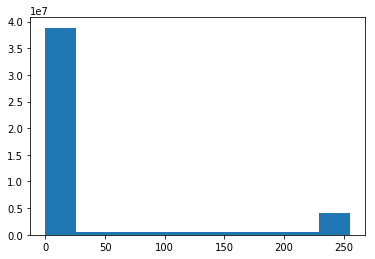

5


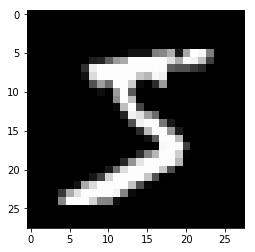

(10000, 28, 28)
0
255


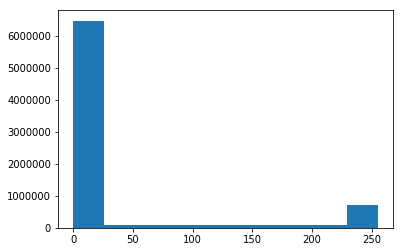

7


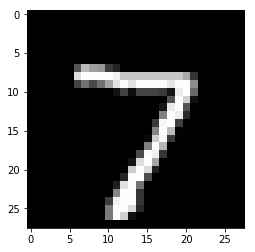

In [49]:
print( x_train.shape )
print( np.min( x_train ) )
print( np.max( x_train ) )

_ = plt.hist(x_train.ravel())
plt.show()
%matplotlib inline 
plt.imshow(x_train[0,:,:], interpolation='nearest')
print( y_train[0] )
plt.show()

print( x_test.shape )
print( np.min( x_test ) )
print( np.max( x_test ) )

_ = plt.hist(x_test.ravel())
plt.show()
%matplotlib inline 
plt.imshow(x_test[0,:,:], interpolation='nearest')
print( y_test[0] )
plt.show()

### Process the Data

In [50]:
# Normalize the data 
x_train, x_test = x_train / 255.0, x_test / 255.0

x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))  # adapt this if using `channels_first` image data format
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))  # adapt this if using `channels_first` image data format

#y_train = to_categorical( y_train, num_classes = 10 )
#y_test = to_categorical( y_test, num_classes = 10 )

## Classification
Mainly used to determine how good of a job the autoencoder does as reconstruction. 

### Build the Model

In [51]:
# Define type of model
classification = tf.keras.models.Sequential()

# Convolutional layers
classification.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
classification.add(MaxPooling2D((2, 2)))
classification.add(Conv2D(64, (3, 3), activation='relu'))
classification.add(MaxPooling2D((2, 2)))
classification.add(Conv2D(64, (3, 3), activation='relu'))

# Standard feed forward, fully connected layers
classification.add(Flatten())
classification.add(Dense(64, activation='relu'))
classification.add(Dense(10, activation='softmax'))

#### Select Loss Function and Optimizer


In [55]:
classification.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [56]:
print( x_train.shape )
print( y_train.shape )
print( y_train[0] )

(60000, 28, 28, 1)
(60000,)
5


### Train Model

In [57]:
classification.fit(x_train, y_train, epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 22s 373us/sample - loss: 0.1464 - accuracy: 0.9553
Epoch 2/5
60000/60000 [==============================] - 24s 403us/sample - loss: 0.0464 - accuracy: 0.9856
Epoch 3/5
60000/60000 [==============================] - 24s 403us/sample - loss: 0.0320 - accuracy: 0.9900
Epoch 4/5
60000/60000 [==============================] - 24s 393us/sample - loss: 0.0259 - accuracy: 0.9916
Epoch 5/5
60000/60000 [==============================] - 22s 374us/sample - loss: 0.0207 - accuracy: 0.9936


### Test Model

10000/10000 [==============================] - 1s 103us/sample - loss: 0.0280 - accuracy: 0.9916


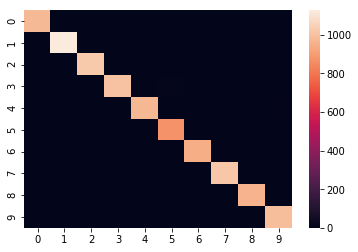

In [59]:
classification.evaluate(x_test, y_test)
confusion = tf.math.confusion_matrix( tf.argmax(input=classification.predict(x_test), axis=1), y_test )
sn.heatmap( confusion )

## Autoencoder

### Build the Model

In [60]:
input_img = Input(shape=(28, 28, 1))  # adapt this if using `channels_first` image data format

x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (4, 4, 8) i.e. 128-dimensional

x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)

#### Select Loss Function and Optimizer

In [61]:
# loss function is usually either the mean-squared error or cross-entropy between the output and the input, known as the reconstruction loss, which penalizes the network for creating outputs different from the input
autoencoder.compile(optimizer='adam',           # Optimizer favored over standard gradient decent
                    loss='binary_crossentropy', # Standard loss for multiclass classification
                    metrics=['mse'])       # Typical metric for classification performance

### Train Model

In [62]:
autoencoder.fit(x_train, x_train, 
                epochs=10,
                batch_size=128,      
                shuffle=True,
                validation_data=(x_test, x_test) )

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 36s 592us/sample - loss: 0.2065 - mse: 0.0482 - val_loss: 0.1406 - val_mse: 0.0267
Epoch 2/10
60000/60000 [==============================] - 36s 597us/sample - loss: 0.1321 - mse: 0.0237 - val_loss: 0.1242 - val_mse: 0.0210
Epoch 3/10
60000/60000 [==============================] - 36s 601us/sample - loss: 0.1223 - mse: 0.0203 - val_loss: 0.1181 - val_mse: 0.0189
Epoch 4/10
60000/60000 [==============================] - 36s 602us/sample - loss: 0.1174 - mse: 0.0186 - val_loss: 0.1141 - val_mse: 0.0176
Epoch 5/10
60000/60000 [==============================] - 37s 611us/sample - loss: 0.1140 - mse: 0.0175 - val_loss: 0.1114 - val_mse: 0.0166
Epoch 6/10
60000/60000 [==============================] - 37s 617us/sample - loss: 0.1115 - mse: 0.0166 - val_loss: 0.1097 - val_mse: 0.0161
Epoch 7/10
60000/60000 [==============================] - 37s 609us/sample - loss: 0.1096 - mse: 0.0160 

### Evaluate Model Performance on Test Set

In [63]:
decoded_imgs = model.predict(x_test)

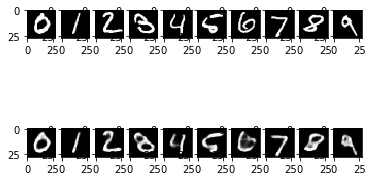

In [64]:
for i in range( 10 ):
    index = np.where( y_test == i )[0][0]
    plt.subplot( 2, 10, i+1 )
    plt.imshow(x_test[index].reshape(28, 28))
    plt.gray()
    plt.subplot( 2, 10, i+11 )
    plt.imshow(decoded_imgs[index].reshape(28, 28))
    plt.gray()


### Evaluate Model Performance with Classifier

10000/10000 [==============================] - 1s 94us/sample - loss: 0.2439 - accuracy: 0.9270


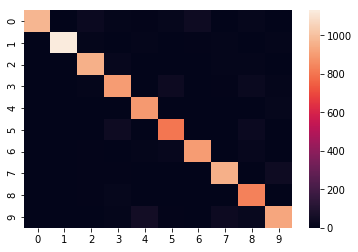

In [65]:
classification.evaluate(decoded_imgs, y_test)
confusion = tf.math.confusion_matrix( tf.argmax(input=classification.predict(decoded_imgs), axis=1), y_test )
sn.heatmap( confusion )

## Variational Autoencoder